Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set()

In [55]:
games = pd.read_csv("data/games.csv")
turns = pd.read_csv("data/turns.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [56]:
def get_df_stats(dataframe):
    print(f'Columns info: {dataframe.info()}')
    print(f'Missing Values: {dataframe.isnull().sum().sum()}')

In [57]:
get_df_stats(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB
Columns info: None
Missing Values: 0


In [58]:
get_df_stats(turns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB
Columns info: None
Missing Values: 202478


In [59]:
get_df_stats(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB
Columns info: None
Missing Values: 0


In [60]:
get_df_stats(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44726 entries, 0 to 44725
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   game_id   44726 non-null  int64  
 1   nickname  44726 non-null  object 
 2   score     44726 non-null  int64  
 3   rating    22363 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB
Columns info: None
Missing Values: 22363


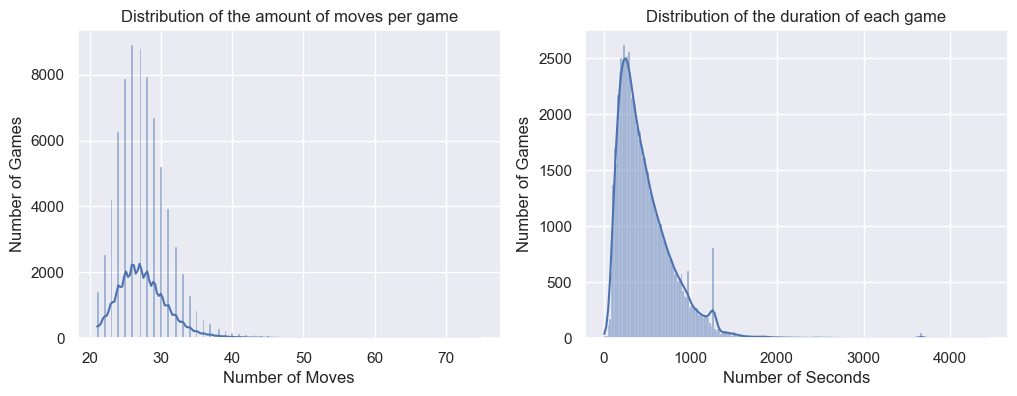

In [120]:
fix, ax = plt.subplots(1, 2, figsize=(12, 4))

turns_per_game = turns.groupby('game_id')['turn_number'].agg('size')

sns.histplot(turns_per_game, kde=True, ax=ax[0])
ax[0].set_xlabel("Number of Moves")
ax[0].set_ylabel("Number of Games")
ax[0].set_title("Distribution of the amount of moves per game")

sns.histplot(games['game_duration_seconds'], kde=True, ax=ax[1])
ax[1].set_xlabel("Number of Seconds")
ax[1].set_ylabel("Number of Games")
ax[1].set_title("Distribution of the duration of each game")
plt.show()

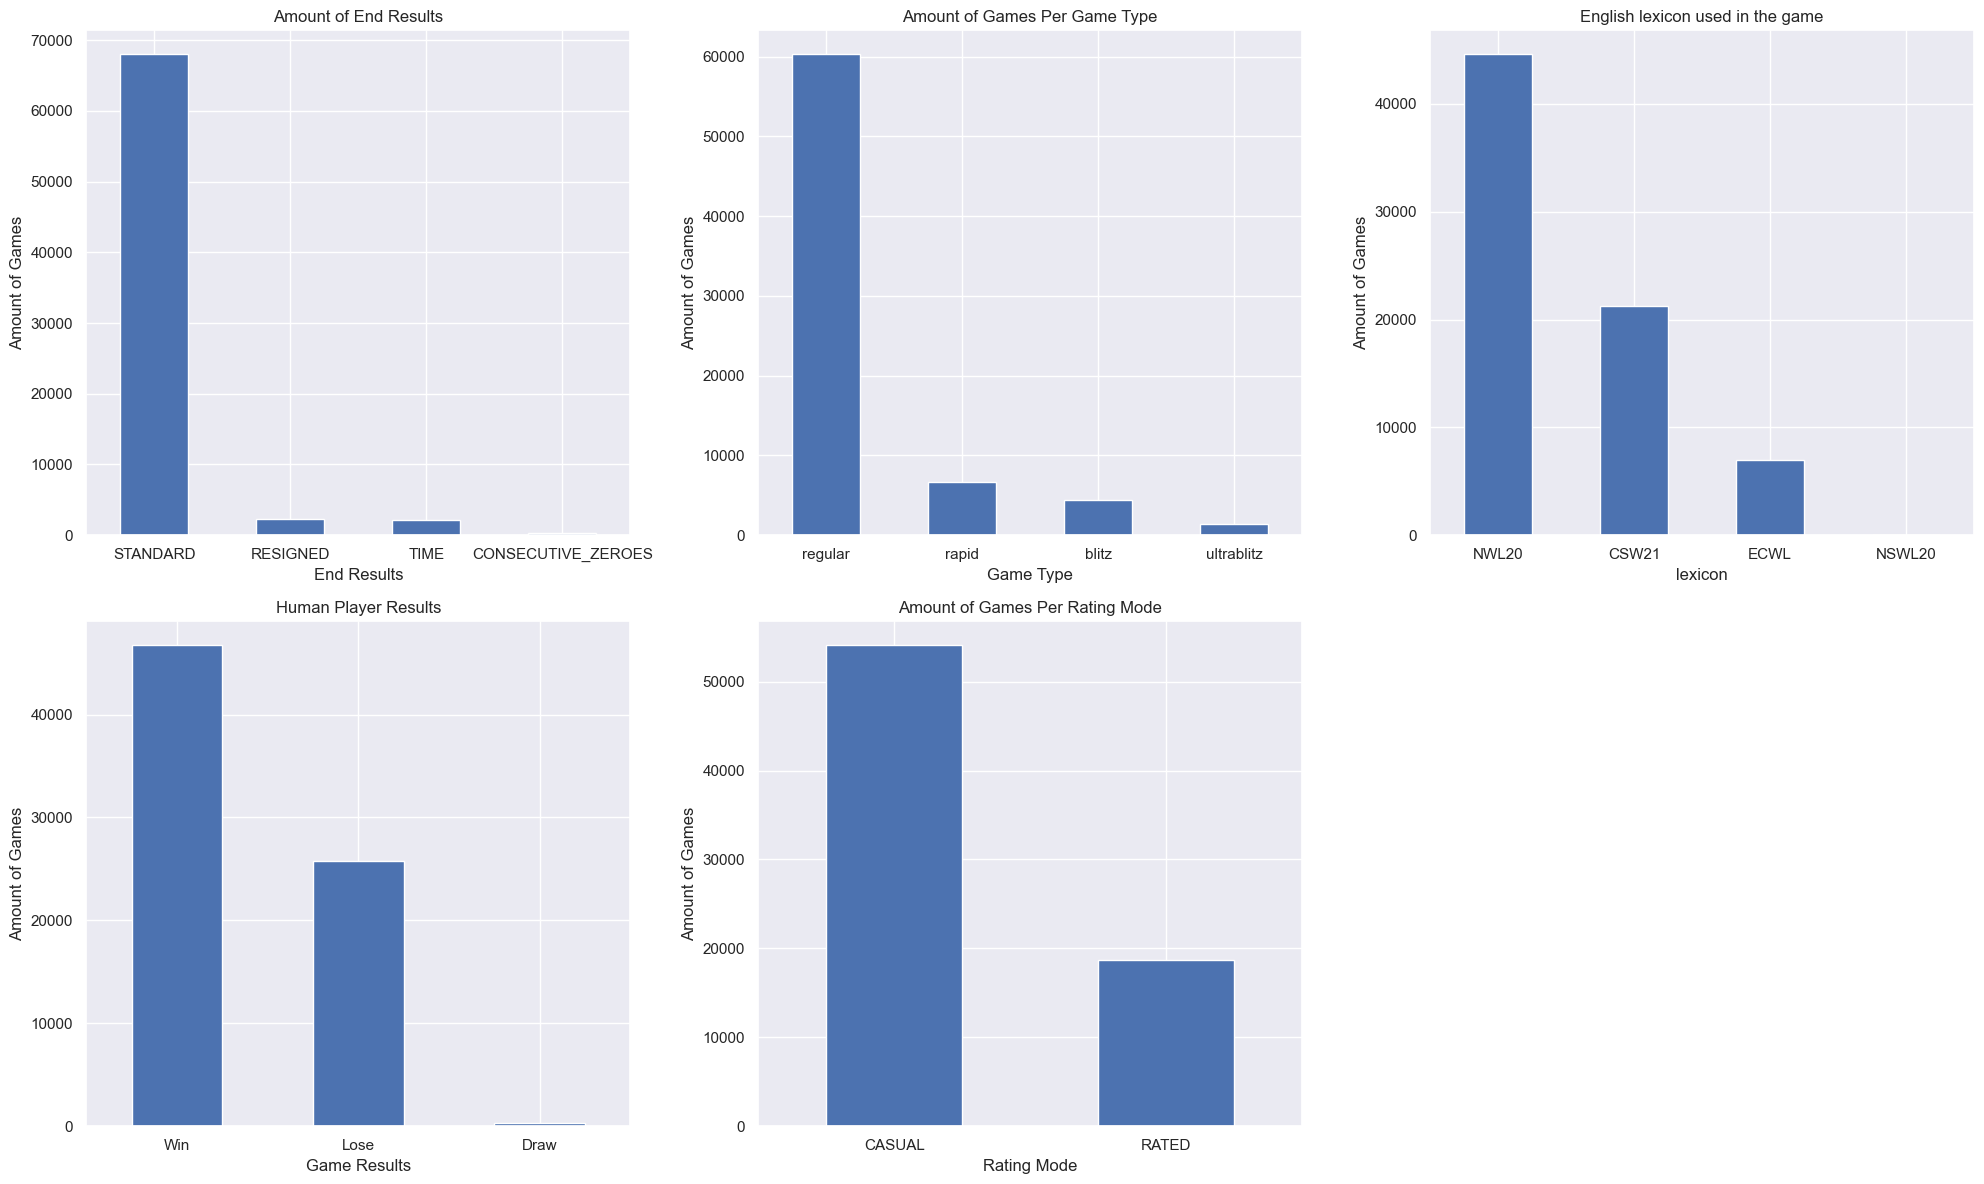

In [159]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

games['game_end_reason'].value_counts().plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Amount of End Results')
ax[0, 0].set_xlabel('End Results')
ax[0, 0].set_ylabel('Amount of Games')
ax[0, 0].set_xticklabels(games['game_end_reason'].unique(), rotation=360)

games['time_control_name'].value_counts().plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Amount of Games Per Game Type')
ax[0, 1].set_xlabel('Game Type')
ax[0, 1].set_ylabel('Amount of Games')
ax[0, 1].set_xticklabels(games['time_control_name'].unique(), rotation=360)

games['lexicon'].value_counts().plot(kind='bar', ax=ax[0, 2])
ax[0, 2].set_title('English lexicon used in the game')
ax[0, 2].set_xlabel('lexicon')
ax[0, 2].set_ylabel('Amount of Games')
ax[0, 2].set_xticklabels(games['lexicon'].unique(), rotation=360)

games['winner'].value_counts().plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Human Player Results')
ax[1, 0].set_xlabel('Game Results')
ax[1, 0].set_ylabel('Amount of Games')
ax[1, 0].set_xticklabels(['Win', 'Lose', 'Draw'], rotation=360)


games['rating_mode'].value_counts().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Amount of Games Per Rating Mode')
ax[1, 1].set_xlabel('Rating Mode')
ax[1, 1].set_ylabel('Amount of Games')
ax[1, 1].set_xticklabels(games['rating_mode'].unique(), rotation=360)

fig.delaxes(ax[1, 2])

plt.tight_layout()
plt.show()

Turns Dataset EDA

Text(0.5, 1.0, 'Correlation Matrix Between Score and Rating')

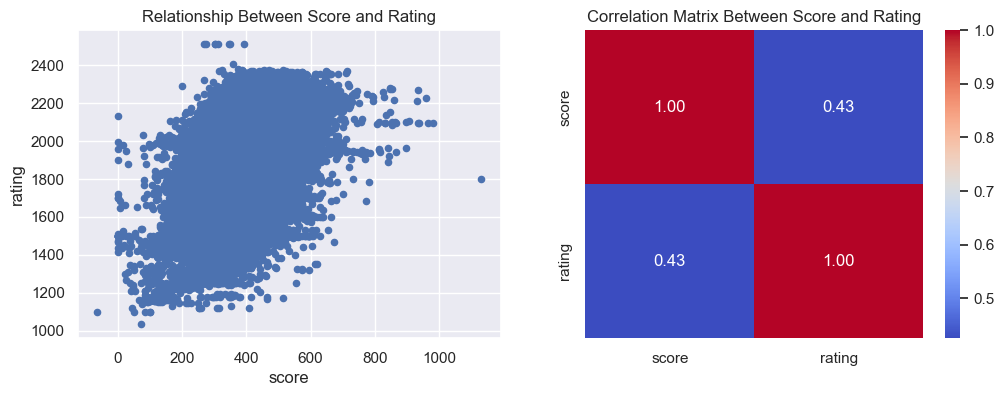

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.plot.scatter(x='score', y='rating', ax=ax[0])
ax[0].set_title('Relationship Between Score and Rating')

sns.heatmap(train[['score', 'rating']].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix Between Score and Rating')

In [307]:
game_nicknames = turns[['game_id', 'nickname']].drop_duplicates()
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']
game_nicknames['is_bot'] = game_nicknames['nickname'].apply(lambda x: True if x in bot_names else False)
player_names, counts = np.unique(game_nicknames[game_nicknames['is_bot'] == False]['nickname'], return_counts=True)
print(f'Number of human players is: {len(player_names)}')

Number of human players is: 1468


Text(1200, 7575, 'Outlier')

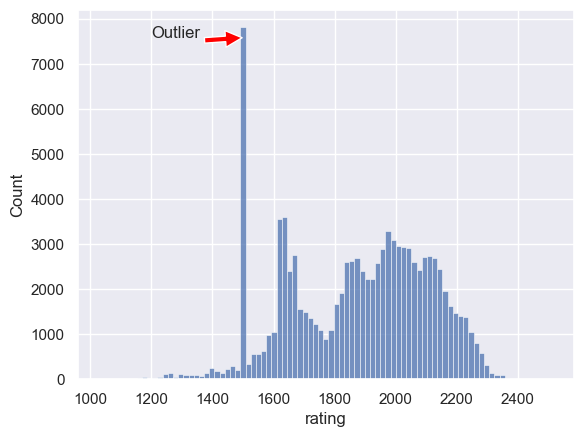

In [305]:
sns.histplot(train['rating'])
plt.annotate('Outlier', xy=(1500, train['rating'].value_counts().max()), xytext=(1200, train['rating'].value_counts().max()),
             arrowprops=dict(facecolor='red', shrink=0.02))
